In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler, MinMaxScaler, PowerTransformer
from scipy.stats import chi2_contingency,ttest_ind, f_oneway

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sma

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier,\
StackingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score,\
confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

#

In [2]:
data=pd.read_csv('bird_strikes.csv')

In [3]:
data.head()

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23T00:00:00,Caused damage,2,US AIRWAYS*,New York,Climb,NaN,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,False,30736,1500.0,0,True
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25T00:00:00,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,NaN,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,True,0,0.0,0,False
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14T00:00:00,No damage,2,BUSINESS,Louisiana,Approach,NaN,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,False,0,50.0,0,False
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05T00:00:00,No damage,2,ALASKA AIRLINES,Washington,Climb,NaN,True,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,True,0,50.0,0,True
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23T00:00:00,No damage,2,COMAIR AIRLINES,Virginia,Approach,NaN,False,False,NO DMG REPTD.,Small,No Cloud,European starling,False,0,50.0,0,False


In [4]:
data.shape

(25558, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   record_id                                25558 non-null  int64  
 1   aircraft_type                            25429 non-null  object 
 2   airport_name                             25429 non-null  object 
 3   altitude_bin                             25429 non-null  object 
 4   aircraft_make_model                      25558 non-null  object 
 5   wildlife_number_struck                   25429 non-null  object 
 6   wildlife_number_struck_actual            25558 non-null  int64  
 7   effect_impact_to_flight                  2078 non-null   object 
 8   flightdate                               25429 non-null  object 
 9   effect_indicated_damage                  25558 non-null  object 
 10  aircraft_number_of_engines               25291

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
record_id,25558.0,253916.085609,38510.453382,1195.0,225783.75,248749.0,269168.75,321909.0
wildlife_number_struck_actual,25558.0,2.691525,12.793975,1.0,1.00,1.0,1.00,942.0
cost_total,25558.0,5567.354449,121971.267772,0.0,0.00,0.0,0.00,12397751.0
feet_above_ground,25429.0,799.028432,1740.079843,0.0,0.00,50.0,700.00,18000.0
number_of_people_injured,25558.0,0.001056,0.050420,0.0,0.00,0.0,0.00,6.0


#

# EDA + Data Preprocessing

In [7]:
data.select_dtypes(include=['int64','float64'])

,record_id,wildlife_number_struck_actual,cost_total,feet_above_ground,number_of_people_injured
0,202152,859,30736,1500.0,0
1,208159,424,0,0.0,0
2,207601,261,0,50.0,0
3,215953,806,0,50.0,0
4,219878,942,0,50.0,0
...,...,...,...,...,...
25553,321151,1,0,1500.0,0
25554,319677,1,0,0.0,0
25555,319680,1,0,NaN,0
25556,319679,1,0,0.0,0


In [8]:
data.select_dtypes(include=['category','object'])

,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,effect_impact_to_flight,flightdate,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,conditions_precipitation,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,is_aircraft_large
0,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,Engine Shut Down,2000-11-23T00:00:00,Caused damage,2,US AIRWAYS*,New York,Climb,NaN,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,False,True
1,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,NaN,2001-07-25T00:00:00,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,NaN,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,True,False
2,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,NaN,2001-09-14T00:00:00,No damage,2,BUSINESS,Louisiana,Approach,NaN,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,False,False
3,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,Precautionary Landing,2002-09-05T00:00:00,No damage,2,ALASKA AIRLINES,Washington,Climb,NaN,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,True,True
4,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,NaN,2003-06-23T00:00:00,No damage,2,COMAIR AIRLINES,Virginia,Approach,NaN,NO DMG REPTD.,Small,No Cloud,European starling,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,NaN,2011-12-30T00:00:00,No damage,2,SKYWEST AIRLINES,California,Approach,Fog,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,False,False
25554,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,NaN,2011-12-30T00:00:00,No damage,2,US AIRWAYS,Florida,Landing Roll,NaN,NaN,Small,Some Cloud,Tree swallow,True,False
25555,NaN,NaN,NaN,EC-135,NaN,NaN,NaN,No damage,NaN,NaN,Virginia,NaN,NaN,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,NaN
25556,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,NaN,2011-12-31T00:00:00,No damage,2,DELTA AIR LINES,Michigan,Landing Roll,NaN,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,True,True


In [9]:
data.select_dtypes(include=['bool'])

,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian
0,False,False
1,False,False
2,False,False
3,True,False
4,False,False
...,...,...
25553,False,False
25554,False,False
25555,False,False
25556,False,False


In [10]:
for i in data:
    print(f'column: {i}\n')
    print(f'number of unique values in {i}: {data[i].nunique()}\n')
    print(f'unique values in {i}: {data[i].unique()}\n')
    print(f'value count in {i}: {data[i].value_counts()}\n')
    print(f'%age of values in {i}: {data[i].value_counts(normalize=True)*100}\n\n\n')

column: record_id

number of unique values in record_id: 25558

unique values in record_id: [202152 208159 207601 ... 319680 319679 319593]

value count in record_id: record_id
202152    1
254643    1
258806    1
257552    1
257811    1
         ..
218134    1
215563    1
220925    1
218412    1
319593    1
Name: count, Length: 25558, dtype: int64

%age of values in record_id: record_id
202152    0.003913
254643    0.003913
258806    0.003913
257552    0.003913
257811    0.003913
            ...   
218134    0.003913
215563    0.003913
220925    0.003913
218412    0.003913
319593    0.003913
Name: proportion, Length: 25558, dtype: float64



column: aircraft_type

number of unique values in aircraft_type: 1

unique values in aircraft_type: ['Airplane' nan]

value count in aircraft_type: aircraft_type
Airplane    25429
Name: count, dtype: int64

%age of values in aircraft_type: aircraft_type
Airplane    100.0
Name: proportion, dtype: float64



column: airport_name

number of unique val

#

### Detecting/Treating Missing Values and Classification of columns as Numerical, Categorical and Boolean

In [11]:
data.isnull().sum()

record_id                                      0
aircraft_type                                129
airport_name                                 129
altitude_bin                                 129
aircraft_make_model                            0
wildlife_number_struck                       129
wildlife_number_struck_actual                  0
effect_impact_to_flight                    23480
flightdate                                   129
effect_indicated_damage                        0
aircraft_number_of_engines                   267
aircraft_airline_operator                    129
origin_state                                 449
when_phase_of_flight                         129
conditions_precipitation                   23543
remains_of_wildlife_collected                  0
remains_of_wildlife_sent_to_smithsonian        0
remarks                                     4771
wildlife_size                                129
conditions_sky                                 0
wildlife_species    

In [12]:
data.dropna(subset='aircraft_type',inplace=True)

In [13]:
data.isnull().sum()

record_id                                      0
aircraft_type                                  0
airport_name                                   0
altitude_bin                                   0
aircraft_make_model                            0
wildlife_number_struck                         0
wildlife_number_struck_actual                  0
effect_impact_to_flight                    23351
flightdate                                     0
effect_indicated_damage                        0
aircraft_number_of_engines                   234
aircraft_airline_operator                      0
origin_state                                 449
when_phase_of_flight                           0
conditions_precipitation                   23414
remains_of_wildlife_collected                  0
remains_of_wildlife_sent_to_smithsonian        0
remarks                                     4761
wildlife_size                                  0
conditions_sky                                 0
wildlife_species    

In [14]:
data.drop(columns=['effect_impact_to_flight','conditions_precipitation','remarks'], inplace=True)

In [15]:
data.isnull().sum()

record_id                                    0
aircraft_type                                0
airport_name                                 0
altitude_bin                                 0
aircraft_make_model                          0
wildlife_number_struck                       0
wildlife_number_struck_actual                0
flightdate                                   0
effect_indicated_damage                      0
aircraft_number_of_engines                 234
aircraft_airline_operator                    0
origin_state                               449
when_phase_of_flight                         0
remains_of_wildlife_collected                0
remains_of_wildlife_sent_to_smithsonian      0
wildlife_size                                0
conditions_sky                               0
wildlife_species                             0
pilot_warned_of_birds_or_wildlife            0
cost_total                                   0
feet_above_ground                            0
number_of_peo

In [16]:
data['aircraft_number_of_engines']=data['aircraft_number_of_engines'].fillna(data['aircraft_number_of_engines'].mode()[0])
data['origin_state']=data['origin_state'].fillna(data['origin_state'].mode()[0])

In [17]:
data.isnull().sum()

record_id                                  0
aircraft_type                              0
airport_name                               0
altitude_bin                               0
aircraft_make_model                        0
wildlife_number_struck                     0
wildlife_number_struck_actual              0
flightdate                                 0
effect_indicated_damage                    0
aircraft_number_of_engines                 0
aircraft_airline_operator                  0
origin_state                               0
when_phase_of_flight                       0
remains_of_wildlife_collected              0
remains_of_wildlife_sent_to_smithsonian    0
wildlife_size                              0
conditions_sky                             0
wildlife_species                           0
pilot_warned_of_birds_or_wildlife          0
cost_total                                 0
feet_above_ground                          0
number_of_people_injured                   0
is_aircraf

In [18]:
data['is_aircraft_large']=data['is_aircraft_large'].astype('bool')
data['pilot_warned_of_birds_or_wildlife']=data['pilot_warned_of_birds_or_wildlife'].astype('bool')

In [19]:
data[data.duplicated(subset='record_id')]

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,flightdate,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large


In [20]:
data.set_index('record_id', inplace=True)

In [21]:
data['flight_year'] = pd.to_datetime(data['flightdate']).dt.year
data['flight_month'] = pd.to_datetime(data['flightdate']).dt.month
data['flight_weekday'] = pd.to_datetime(data['flightdate']).dt.weekday

In [22]:
data.drop(columns=['flightdate','aircraft_type'], inplace=True)

In [23]:
data.dtypes

airport_name                                object
altitude_bin                                object
aircraft_make_model                         object
wildlife_number_struck                      object
wildlife_number_struck_actual                int64
effect_indicated_damage                     object
aircraft_number_of_engines                  object
aircraft_airline_operator                   object
origin_state                                object
when_phase_of_flight                        object
remains_of_wildlife_collected                 bool
remains_of_wildlife_sent_to_smithsonian       bool
wildlife_size                               object
conditions_sky                              object
wildlife_species                            object
pilot_warned_of_birds_or_wildlife             bool
cost_total                                   int64
feet_above_ground                          float64
number_of_people_injured                     int64
is_aircraft_large              

In [24]:
num_cols=data.select_dtypes(include=['int','float'])
num_cols

,wildlife_number_struck_actual,cost_total,feet_above_ground,number_of_people_injured,flight_year,flight_month,flight_weekday
record_id,,,,,,,
202152,859,30736,1500.0,0,2000,11,3
208159,424,0,0.0,0,2001,7,2
207601,261,0,50.0,0,2001,9,4
215953,806,0,50.0,0,2002,9,3
219878,942,0,50.0,0,2003,6,0
...,...,...,...,...,...,...,...
319672,1,0,10.0,0,2011,12,3
321151,1,0,1500.0,0,2011,12,4
319677,1,0,0.0,0,2011,12,4


In [25]:
cat_cols=data.select_dtypes(include=['category','object']).drop(columns=['effect_indicated_damage'])
cat_cols

,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,wildlife_size,conditions_sky,wildlife_species
record_id,,,,,,,,,,,
202152,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,2,US AIRWAYS*,New York,Climb,Medium,No Cloud,Unknown bird - medium
208159,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,2,AMERICAN AIRLINES,Texas,Landing Roll,Small,Some Cloud,Rock pigeon
207601,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,2,BUSINESS,Louisiana,Approach,Small,No Cloud,European starling
215953,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,2,ALASKA AIRLINES,Washington,Climb,Small,Some Cloud,European starling
219878,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,2,COMAIR AIRLINES,Virginia,Approach,Small,No Cloud,European starling
...,...,...,...,...,...,...,...,...,...,...,...
319672,SACRAMENTO INTL,< 1000 ft,B-737-700,1,2,SOUTHWEST AIRLINES,California,Approach,Medium,No Cloud,Mallard
321151,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,2,SKYWEST AIRLINES,California,Approach,Large,Overcast,Unknown bird - large
319677,ORLANDO INTL,< 1000 ft,A-321,1,2,US AIRWAYS,Florida,Landing Roll,Small,Some Cloud,Tree swallow


In [26]:
bool_cols=data.select_dtypes(include=['bool'])
bool_cols

,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,pilot_warned_of_birds_or_wildlife,is_aircraft_large
record_id,,,,
202152,False,False,False,True
208159,False,False,True,False
207601,False,False,False,False
215953,True,False,True,True
219878,False,False,False,False
...,...,...,...,...
319672,True,True,True,True
321151,False,False,False,False
319677,False,False,True,False


In [27]:
catbools=data.select_dtypes(include=['category','object','bool']).drop(columns=['effect_indicated_damage'])
catbools

,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,is_aircraft_large
record_id,,,,,,,,,,,,,,,
202152,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,2,US AIRWAYS*,New York,Climb,False,False,Medium,No Cloud,Unknown bird - medium,False,True
208159,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,2,AMERICAN AIRLINES,Texas,Landing Roll,False,False,Small,Some Cloud,Rock pigeon,True,False
207601,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,2,BUSINESS,Louisiana,Approach,False,False,Small,No Cloud,European starling,False,False
215953,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,2,ALASKA AIRLINES,Washington,Climb,True,False,Small,Some Cloud,European starling,True,True
219878,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,2,COMAIR AIRLINES,Virginia,Approach,False,False,Small,No Cloud,European starling,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319672,SACRAMENTO INTL,< 1000 ft,B-737-700,1,2,SOUTHWEST AIRLINES,California,Approach,True,True,Medium,No Cloud,Mallard,True,True
321151,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,2,SKYWEST AIRLINES,California,Approach,False,False,Large,Overcast,Unknown bird - large,False,False
319677,ORLANDO INTL,< 1000 ft,A-321,1,2,US AIRWAYS,Florida,Landing Roll,False,False,Small,Some Cloud,Tree swallow,True,False


#

### Detecting/Treating Outliers 

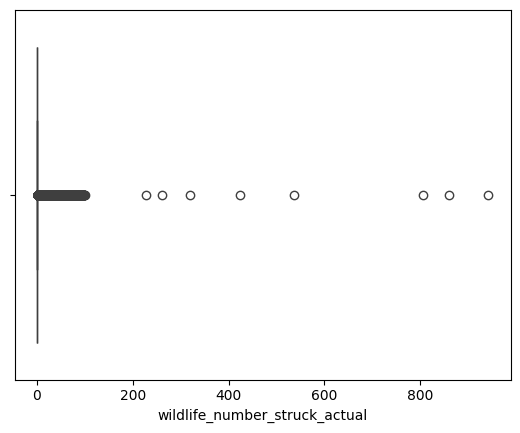

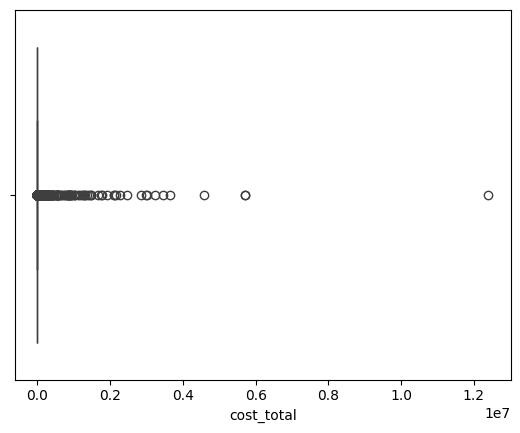

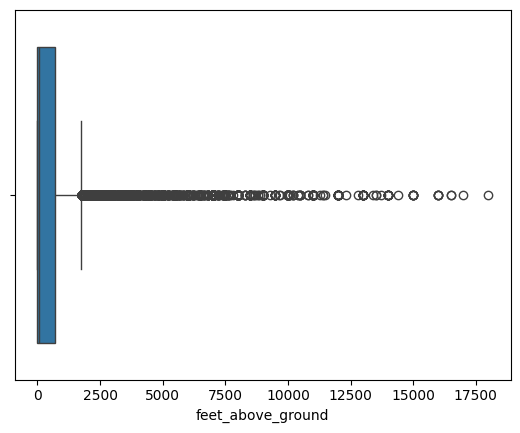

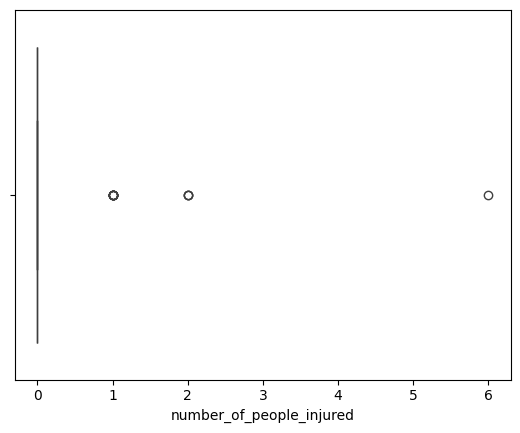

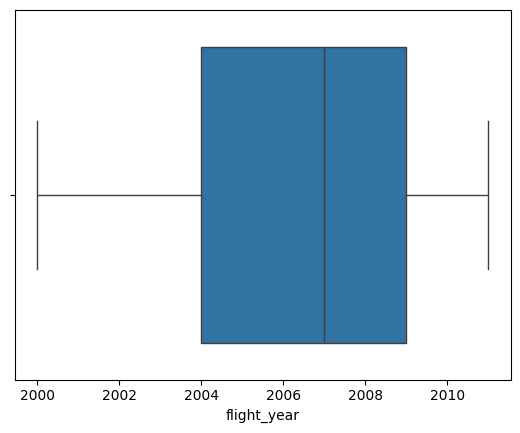

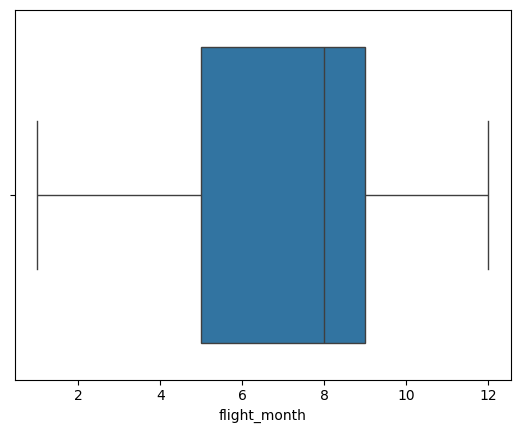

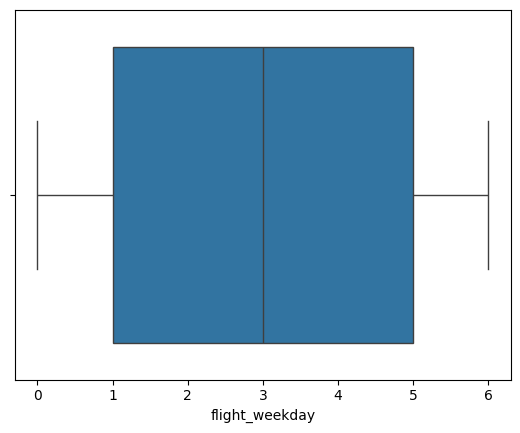

In [28]:
for i in num_cols:
    sns.boxplot(data=data, x=i)
    plt.show()

#

### Encoding the categorical columns

In [29]:
cat_cols.columns

Index(['airport_name', 'altitude_bin', 'aircraft_make_model',
       'wildlife_number_struck', 'aircraft_number_of_engines',
       'aircraft_airline_operator', 'origin_state', 'when_phase_of_flight',
       'wildlife_size', 'conditions_sky', 'wildlife_species'],
      dtype='object')

In [30]:
catbools.columns

Index(['airport_name', 'altitude_bin', 'aircraft_make_model',
       'wildlife_number_struck', 'aircraft_number_of_engines',
       'aircraft_airline_operator', 'origin_state', 'when_phase_of_flight',
       'remains_of_wildlife_collected',
       'remains_of_wildlife_sent_to_smithsonian', 'wildlife_size',
       'conditions_sky', 'wildlife_species',
       'pilot_warned_of_birds_or_wildlife', 'is_aircraft_large'],
      dtype='object')

In [31]:
for i in catbools:
    print(f'column: {i}\n')
    print(f'number of unique values in {i}: {data[i].nunique()}\n')
    print(f'unique values in {i}: {data[i].unique()}\n')
    print(f'value count in {i}: {data[i].value_counts()}\n')
    print(f'%age of values in {i}: {data[i].value_counts(normalize=True)*100}\n\n\n')

column: airport_name

number of unique values in airport_name: 1109

unique values in airport_name: ['LAGUARDIA NY' 'DALLAS/FORT WORTH INTL ARPT' 'LAKEFRONT AIRPORT' ...
 'LAKE PALOURDE BASE HELIPORT' 'CULPEPER REGIONAL ARPT' 'PRINCESS JULIANA']

value count in airport_name: airport_name
DALLAS/FORT WORTH INTL ARPT    803
SACRAMENTO INTL                676
SALT LAKE CITY INTL            479
DENVER INTL AIRPORT            476
KANSAS CITY INTL               452
                              ... 
ORCAS ISLAND ARPT                1
T B LETTSOME INTL                1
DYERSBURG REGIONAL ARPT          1
MCCORD FIELD ARPT                1
PRINCESS JULIANA                 1
Name: count, Length: 1109, dtype: int64

%age of values in airport_name: airport_name
DALLAS/FORT WORTH INTL ARPT    3.157812
SACRAMENTO INTL                2.658382
SALT LAKE CITY INTL            1.883676
DENVER INTL AIRPORT            1.871879
KANSAS CITY INTL               1.777498
                                 ...   


##### Label Encoding

In [32]:
le = LabelEncoder()

data['remains_of_wildlife_collected'] = le.fit_transform(data['remains_of_wildlife_collected'])
data['remains_of_wildlife_sent_to_smithsonian'] = le.fit_transform(data['remains_of_wildlife_sent_to_smithsonian'])
data['pilot_warned_of_birds_or_wildlife'] = le.fit_transform(data['pilot_warned_of_birds_or_wildlife'])
data['is_aircraft_large'] = le.fit_transform(data['is_aircraft_large'])
data['when_phase_of_flight'] = le.fit_transform(data['when_phase_of_flight'])
data['conditions_sky'] = le.fit_transform(data['conditions_sky'])


##### Frequency Encoding

In [33]:
freq_encoding1 = data['airport_name'].value_counts(normalize=True) 
freq_encoding2 = data['aircraft_make_model'].value_counts(normalize=True) 
freq_encoding3 = data['aircraft_airline_operator'].value_counts(normalize=True) 
freq_encoding4 = data['origin_state'].value_counts(normalize=True) 
freq_encoding5 = data['wildlife_species'].value_counts(normalize=True) 

data['airport_name'] = data['airport_name'].map(freq_encoding1)
data['aircraft_make_model'] = data['aircraft_make_model'].map(freq_encoding2)
data['aircraft_airline_operator'] = data['aircraft_airline_operator'].map(freq_encoding3)
data['origin_state'] = data['origin_state'].map(freq_encoding4)
data['wildlife_species'] = data['wildlife_species'].map(freq_encoding5)

##### Ordinal Encoding

In [34]:
categories_order1 = [['< 1000 ft', '> 1000 ft']] 
categories_order2 = [['1', '2 to 10', '11 to 100', 'Over 100']]
categories_order3 = [['1', '2', '3', '4', 'C']]
categories_order4 = [['Small', 'Medium', 'Large']]
categories_order5=[['No damage','Caused damage']]


oe1 = OrdinalEncoder(categories=categories_order1)
data['altitude_bin'] = oe1.fit_transform(data[['altitude_bin']])

oe2 = OrdinalEncoder(categories=categories_order2)
data['wildlife_number_struck'] = oe2.fit_transform(data[['wildlife_number_struck']])

oe3 = OrdinalEncoder(categories=categories_order3)
data['aircraft_number_of_engines'] = oe3.fit_transform(data[['aircraft_number_of_engines']])

oe4 = OrdinalEncoder(categories=categories_order4)
data['wildlife_size'] = oe4.fit_transform(data[['wildlife_size']])     
                      
oe5 = OrdinalEncoder(categories=categories_order5)
data['effect_indicated_damage'] = oe5.fit_transform(data[['effect_indicated_damage']])     
                      

In [35]:
data.head()

,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large,flight_year,flight_month,flight_weekday
record_id,,,,,,,,,,,,,,,,,,,,,,,
202152,0.010343,1.0,0.013017,3.0,859,1.0,1.0,0.031342,0.051752,1,0,0,1.0,0,0.168980,0,30736,1500.0,0,1,2000,11,3
208159,0.031578,0.0,0.013921,3.0,424,1.0,1.0,0.080931,0.096150,3,0,0,0.0,2,0.023281,1,0,0.0,0,0,2001,7,2
207601,0.000590,0.0,0.000904,3.0,261,0.0,1.0,0.120886,0.015062,0,0,0,0.0,0,0.034803,0,0,50.0,0,0,2001,9,4
215953,0.005388,0.0,0.013017,3.0,806,0.0,1.0,0.011955,0.012938,1,1,0,0.0,2,0.034803,1,0,50.0,0,1,2002,9,3
219878,0.004050,0.0,0.076723,3.0,942,0.0,1.0,0.012466,0.011601,0,0,0,0.0,0,0.034803,0,0,50.0,0,0,2003,6,0


#

### Scaling

In [36]:
# scaler= MinMaxScaler()
# scaled= pd.DataFrame(scaler.fit_transform(numcols), columns=numcols.columns)

In [37]:
# scaled

#

### Transformation

In [38]:
# pt= PowerTransformer(method='yeo-johnson', standardize=True)
# df= pd.DataFrame(pt.fit_transform(scaled_data), columns=scaled_data.columns)

In [39]:
# df

#

In [40]:
# data.head()

In [41]:
# data[data['effect_indicated_damage']=='No damage']['cost_total'].value_counts()

In [42]:
# data[data['effect_indicated_damage']=='Caused damage']['cost_total'].value_counts()

In [43]:
# pd.crosstab(data['cost_total'], data['effect_indicated_damage'])

#

# Fitting the Models

In [44]:
# class imbalance 

data['effect_indicated_damage'].value_counts()

effect_indicated_damage
0.0    22975
1.0     2454
Name: count, dtype: int64

In [45]:
data.head()

,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large,flight_year,flight_month,flight_weekday
record_id,,,,,,,,,,,,,,,,,,,,,,,
202152,0.010343,1.0,0.013017,3.0,859,1.0,1.0,0.031342,0.051752,1,0,0,1.0,0,0.168980,0,30736,1500.0,0,1,2000,11,3
208159,0.031578,0.0,0.013921,3.0,424,1.0,1.0,0.080931,0.096150,3,0,0,0.0,2,0.023281,1,0,0.0,0,0,2001,7,2
207601,0.000590,0.0,0.000904,3.0,261,0.0,1.0,0.120886,0.015062,0,0,0,0.0,0,0.034803,0,0,50.0,0,0,2001,9,4
215953,0.005388,0.0,0.013017,3.0,806,0.0,1.0,0.011955,0.012938,1,1,0,0.0,2,0.034803,1,0,50.0,0,1,2002,9,3
219878,0.004050,0.0,0.076723,3.0,942,0.0,1.0,0.012466,0.011601,0,0,0,0.0,0,0.034803,0,0,50.0,0,0,2003,6,0


In [46]:
y = data['effect_indicated_damage']
x = data.drop(columns=['effect_indicated_damage','flight_year','flight_month','flight_weekday'])

In [47]:
numcols=['wildlife_number_struck_actual', 'cost_total', 'feet_above_ground', 'number_of_people_injured']
numcols

['wildlife_number_struck_actual',
 'cost_total',
 'feet_above_ground',
 'number_of_people_injured']

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.7, stratify=y, random_state=2)

In [49]:
x_train.shape

(17800, 19)

In [50]:
y_train.shape

(17800,)

In [51]:
x_test.shape

(7629, 19)

In [52]:
y_test.shape

(7629,)

In [53]:
x.columns

Index(['airport_name', 'altitude_bin', 'aircraft_make_model',
       'wildlife_number_struck', 'wildlife_number_struck_actual',
       'aircraft_number_of_engines', 'aircraft_airline_operator',
       'origin_state', 'when_phase_of_flight', 'remains_of_wildlife_collected',
       'remains_of_wildlife_sent_to_smithsonian', 'wildlife_size',
       'conditions_sky', 'wildlife_species',
       'pilot_warned_of_birds_or_wildlife', 'cost_total', 'feet_above_ground',
       'number_of_people_injured', 'is_aircraft_large'],
      dtype='object')

In [54]:
x_train_s= x_train.copy()
x_test_s= x_test.copy()

In [55]:
scaler= MinMaxScaler()

x_train_s[numcols]= scaler.fit_transform(x_train_s[numcols])
x_test_s[numcols]= scaler.transform(x_test_s[numcols])

In [56]:
x_train_s.head()

,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
record_id,,,,,,,,,,,,,,,,,,,
315407,0.005152,0.0,0.038932,1.0,0.001063,1.0,0.002910,0.038735,3,1,0,0.0,0,0.002595,1,0.0,0.000000,0.0,0
256455,0.005348,0.0,0.014393,0.0,0.000000,1.0,0.181997,0.009674,5,1,1,1.0,0,0.007668,0,0.0,0.000000,0.0,1
255772,0.009910,0.0,0.013960,0.0,0.000000,1.0,0.023202,0.115931,3,0,0,2.0,2,0.000393,0,0.0,0.000000,0.0,1
311374,0.002438,0.0,0.046915,0.0,0.000000,1.0,0.027842,0.002753,0,0,0,0.0,0,0.410398,0,0.0,0.000606,0.0,0
253757,0.008887,0.0,0.008022,1.0,0.004251,1.0,0.035039,0.115931,0,0,0,0.0,2,0.410398,1,0.0,0.030303,0.0,0


In [57]:
x_test_s.head()

,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
record_id,,,,,,,,,,,,,,,,,,,
266249,0.007826,0.0,0.025089,0.0,0.000000,1.0,0.080931,0.096150,0,0,0,0.0,1,0.410398,0,0.000000,0.045455,0.0,0
302996,0.006528,0.0,0.097841,0.0,0.000000,1.0,0.181997,0.030398,3,0,0,0.0,0,0.035275,0,0.000054,0.000000,0.0,1
267492,0.002281,1.0,0.097841,0.0,0.000000,1.0,0.181997,0.096150,0,0,0,1.0,0,0.168980,0,0.000000,0.121212,0.0,1
260458,0.009910,0.0,0.046915,1.0,0.002125,1.0,0.027842,0.115931,3,0,0,0.0,2,0.410398,0,0.000000,0.000000,0.0,0
243722,0.007629,1.0,0.039325,0.0,0.000000,1.0,0.016359,0.096150,2,0,0,1.0,0,0.168980,0,0.000000,0.527273,0.0,0


### Logistic Regression

In [58]:
model_base = LogisticRegression(random_state=2,class_weight='balanced')

In [59]:
model_base.fit(x_train_s, y_train)

/Users/himanidhawan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=2)

In [60]:
pred_s_lr = model_base.predict_proba(x_test_s)[:,1]
pred_h_lr = (pred_s_lr > 0.5).astype(int)

In [61]:
print(classification_report(y_test, pred_h_lr ))

              precision    recall  f1-score   support

         0.0       0.97      0.78      0.86      6893
         1.0       0.27      0.74      0.39       736

    accuracy                           0.78      7629
   macro avg       0.62      0.76      0.63      7629
weighted avg       0.90      0.78      0.82      7629



#

### Decision Tree

In [62]:
model_dt = DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=3,min_samples_split=2,class_weight='balanced')

In [63]:
model_dt.fit(x_train_s,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, min_samples_leaf=3)

In [64]:
pred_dt_s = model_dt.predict_proba(x_test_s)[:,1]
pred_dt_h = (pred_dt_s>0.5).astype(int)

In [65]:
print(classification_report(y_test,pred_dt_h))

              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91      6893
         1.0       0.35      0.72      0.47       736

    accuracy                           0.84      7629
   macro avg       0.66      0.79      0.69      7629
weighted avg       0.91      0.84      0.86      7629



In [66]:
cohen_kappa_score(y_test,pred_dt_h)

0.38702620785300856

#### Hypertuning

In [69]:
grid_dt= {'max_depth': [2,3,4,5,6] ,
      'min_samples_leaf': [2,3] ,
      'max_leaf_nodes': [2,3,4,5] , 
      'min_samples_split': [2,3]}

In [70]:
gscv_dt= GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'), cv=5, scoring='recall',\
                   verbose=3, param_grid=grid_dt)

In [71]:
gscv_dt.fit(x_train_s, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END max_depth=2, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=2;, score=0.764 total time=   0.0s
[CV 2/5] END max_depth=2, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=2;, score=0.770 total time=   0.0s
[CV 3/5] END max_depth=2, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=2;, score=0.747 total time=   0.0s
[CV 4/5] END max_depth=2, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=2;, score=0.730 total time=   0.0s
[CV 5/5] END max_depth=2, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=2;, score=0.741 total time=   0.0s
[CV 1/5] END max_depth=2, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3;, score=0.764 total time=   0.0s
[CV 2/5] END max_depth=2, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3;, score=0.770 total time=   0.0s
[CV 3/5] END max_depth=2, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3;, score=0.747 total time=   0.0s
[C

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3]},
             scoring='recall', verbose=3)

In [72]:
gscv_dt.best_params_

{'max_depth': 2,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [73]:
gscv_dt.best_score_

0.8114126381449591

In [74]:
model_dt_f = DecisionTreeClassifier(class_weight='balanced', **gscv_dt.best_params_)

In [75]:
model_dt_f.fit(x_train_s,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=3,
                       min_samples_leaf=2)

In [76]:
pred_dt_s_f = model_dt_f.predict_proba(x_test_s)[:,1]
pred_dt_h_f = (pred_dt_s_f>0.5).astype(int)

In [77]:
print(classification_report(y_test,pred_dt_h_f))

              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83      6893
         1.0       0.24      0.83      0.37       736

    accuracy                           0.73      7629
   macro avg       0.61      0.78      0.60      7629
weighted avg       0.90      0.73      0.79      7629



In [78]:
cw_0= len(y_train)/ (2*y_train.value_counts()[0])
cw_1= len(y_train)/ (2*y_train.value_counts()[1])

In [79]:
cw_0

0.5534137545081458

In [80]:
cw_1

5.180442374854482

In [83]:
model_dt_2= DecisionTreeClassifier(class_weight={0:cw_0, 1:cw_1}, **gscv_dt.best_params_)

In [84]:
model_dt_2.fit(x_train_s,y_train)

DecisionTreeClassifier(class_weight={0: 0.5534137545081458,
                                     1: 5.180442374854482},
                       max_depth=2, max_leaf_nodes=3, min_samples_leaf=2)

In [85]:
pred_dt_2_s = model_dt_2.predict_proba(x_test_s)[:,1]
pred_dt_2_h = (pred_dt_2_s>0.5).astype(int)

In [86]:
print(classification_report(y_test,pred_dt_2_h))

              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83      6893
         1.0       0.24      0.83      0.37       736

    accuracy                           0.73      7629
   macro avg       0.61      0.78      0.60      7629
weighted avg       0.90      0.73      0.79      7629



In [89]:
model_dt_3= DecisionTreeClassifier(**gscv_dt.best_params_)

In [90]:
model_dt_3.fit(x_train_s,y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, min_samples_leaf=2)

In [91]:
pred_dt_3_s = model_dt_3.predict_proba(x_test_s)[:,1]
pred_dt_3_h = (pred_dt_3_s>0.5).astype(int)

In [92]:
print(classification_report(y_test,pred_dt_3_h))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      6893
         1.0       0.92      0.33      0.48       736

    accuracy                           0.93      7629
   macro avg       0.93      0.66      0.72      7629
weighted avg       0.93      0.93      0.92      7629



#

### Gradient Boost

In [93]:
model_gb = GradientBoostingClassifier()

In [94]:
model_gb.fit(x_train_s,y_train)

GradientBoostingClassifier()

In [95]:
pred_gb_s = model_gb.predict_proba(x_test_s)[:,1]
pred_gb_h = (pred_gb_s>0.5).astype(int)

In [96]:
print(classification_report(y_test,pred_gb_h))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      6893
         1.0       0.85      0.41      0.56       736

    accuracy                           0.94      7629
   macro avg       0.90      0.70      0.76      7629
weighted avg       0.93      0.94      0.93      7629



#

### Ada Boost

In [97]:
model_ab = AdaBoostClassifier()

In [98]:
model_ab.fit(x_train_s,y_train)

AdaBoostClassifier()

In [99]:
pred_ab_s = model_ab.predict_proba(x_test_s)[:,1]
pred_ab_h = (pred_ab_s>0.5).astype(int)

In [100]:
print(classification_report(y_test,pred_ab_h))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      6893
         1.0       0.86      0.39      0.53       736

    accuracy                           0.93      7629
   macro avg       0.90      0.69      0.75      7629
weighted avg       0.93      0.93      0.92      7629



#

### XGBoost

In [101]:
model_xg = XGBClassifier()

In [102]:
model_xg.fit(x_train_s,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [103]:
pred_xg_s = model_xg.predict_proba(x_test_s)[:,1]
pred_xg_h = (pred_xg_s>0.5).astype(int)

In [104]:
print(classification_report(y_test,pred_xg_h))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      6893
         1.0       0.76      0.45      0.56       736

    accuracy                           0.93      7629
   macro avg       0.85      0.72      0.76      7629
weighted avg       0.93      0.93      0.92      7629



In [105]:
cohen_kappa_score(y_test,pred_xg_h)

0.5268170388563791

#### Hypertuning

In [106]:
grid = {'max_depth': [4,5,6,7],
        'learning_rate': [0.01,0.03,0.1],
        'n_estimators': [150,200,250],
        'min_child_weight': [2,3,4],
        'gamma': [1,2,3]
       }

In [107]:
gscv_xg= GridSearchCV(estimator= XGBClassifier(), param_grid=grid, scoring='recall', cv=5, verbose=3)

In [108]:
gscv_xg.fit(x_train_s, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=150;, score=0.294 total time=   0.1s
[CV 2/5] END gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=150;, score=0.329 total time=   0.1s
[CV 3/5] END gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=150;, score=0.291 total time=   0.1s
[CV 4/5] END gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=150;, score=0.273 total time=   0.1s
[CV 5/5] END gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=150;, score=0.291 total time=   0.1s
[CV 1/5] END gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=200;, score=0.312 total time=   0.2s
[CV 2/5] END gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=200;, score=0.353 total time=   0.1s
[CV 3/5] END gamma=1, learning_rate=0.01, max_depth=4, min_ch

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [1, 2, 3], 'learning_rate': [0.01, 0.03, 0.1],
                         'max_depth': [4, 5, 6, 7],
                         'min_child_weight': [2, 3, 4],
                         'n_estimators': [150, 200, 250]},
             scoring='recall', verbose=3)

In [109]:
gscv_xg.best_params_

{'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 4,
 'n_estimators': 150}

In [110]:
gscv_xg.best_score_

0.41270933622618483

In [111]:
model_xg_f = XGBClassifier(**gscv_xg.best_params_)

In [112]:
model_xg_f.fit(x_train_s,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [113]:
pred_xg_s_f = model_xg_f.predict_proba(x_test_s)[:,1]
pred_xg_h_f = (pred_xg_s_f>0.5).astype(int)

In [114]:
print(classification_report(y_test,pred_ab_h))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      6893
         1.0       0.86      0.39      0.53       736

    accuracy                           0.93      7629
   macro avg       0.90      0.69      0.75      7629
weighted avg       0.93      0.93      0.92      7629



#

### Voting 


In [115]:
voting_clf = VotingClassifier(estimators=[('dt', model_dt_f), ('xgb', model_xg), ('gb', model_gb)], voting='soft')


In [116]:
voting_clf.fit(x_train_s, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=2,
                                                     max_leaf_nodes=3,
                                                     min_samples_leaf=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            featu...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [117]:
pred_voting_s = voting_clf.predict_proba(x_test_s)[:,1]
pred_voting_h = (pred_voting_s>0.5).astype(int)

In [118]:
pred_voting_h = voting_clf.predict(x_test_s)

In [119]:
print(classification_report(y_test,pred_voting_h))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      6893
         1.0       0.73      0.49      0.58       736

    accuracy                           0.93      7629
   macro avg       0.84      0.73      0.77      7629
weighted avg       0.93      0.93      0.93      7629



In [120]:
voting_clf2 = VotingClassifier(estimators=[('dt', model_dt_f), ('xgb', model_xg)], voting='soft')


In [121]:
voting_clf2.fit(x_train_s, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=2,
                                                     max_leaf_nodes=3,
                                                     min_samples_leaf=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            featu...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [122]:
pred_voting_s = voting_clf2.predict_proba(x_test_s)[:,1]
pred_voting_h = (pred_voting_s>0.4).astype(int)

In [123]:
print(classification_report(y_test,pred_voting_h))

              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      6893
         1.0       0.37      0.74      0.49       736

    accuracy                           0.85      7629
   macro avg       0.67      0.80      0.70      7629
weighted avg       0.91      0.85      0.87      7629



#

### Stacking 

In [124]:
stacking_clf = StackingClassifier(estimators=[('lr', model_base), ('dt', model_dt_f)], final_estimator=model_xg)
stacking_clf.fit(x_train_s, y_train)

/Users/himanidhawan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/himanidhawan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

StackingClassifier(estimators=[('lr',
                                LogisticRegression(class_weight='balanced',
                                                   random_state=2)),
                               ('dt',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=2,
                                                       max_leaf_nodes=3,
                                                       min_samples_leaf=2))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=N...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [125]:
pred_voting_s = stacking_clf.predict_proba(x_test_s)[:,1]
pred_voting_h = (pred_voting_s>0.2).astype(int)

In [126]:
print(classification_report(y_test,pred_voting_h))

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      6893
         1.0       0.37      0.65      0.47       736

    accuracy                           0.86      7629
   macro avg       0.66      0.77      0.70      7629
weighted avg       0.90      0.86      0.88      7629



#

#

In [127]:
# Function to validate model

m=[]
acu=[]
rec=[]
pre=[]
f1=[]
kap=[]

def model_validation(model, trainx, trainy, testx, testy):
    mod=model
    mod.fit(trainx, trainy)
    pred_s= mod.predict_proba(testx)[:,1]
    pred_h= mod.predict(testx)     # by default threshold value=0.5
    
    print(confusion_matrix(testy, pred_h))
    print(classification_report(testy, pred_h))
    
    fpr,tpr,thres= roc_curve(testy, pred_s)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],color='red',ls='--')
    plt.title(f'ROC AUC : {round(roc_auc_score(testy,pred_s),3)}')
    plt.show()
    
    response= input('Do you want to save this model? Y/N')
    
    if response.lower()=='y':
        global scorecard
        m.append(str(model))
        acu.append(accuracy_score(testy,pred_h))
        rec.append(recall_score(testy,pred_h))
        pre.append(precision_score(testy,pred_h))
        f1.append(f1_score(testy,pred_h))
        kap.append(cohen_kappa_score(testy,pred_h))
        
        scorecard= pd.DataFrame({'Model':m, 'Accuracy':acu, 'Recall':rec, 'Precision':pre, 'F1 Score':f1, 'Cohen Kappa':kap})
    
    else:
        return

[[5387 1506]
 [ 192  544]]
              precision    recall  f1-score   support

         0.0       0.97      0.78      0.86      6893
         1.0       0.27      0.74      0.39       736

    accuracy                           0.78      7629
   macro avg       0.62      0.76      0.63      7629
weighted avg       0.90      0.78      0.82      7629



/Users/himanidhawan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


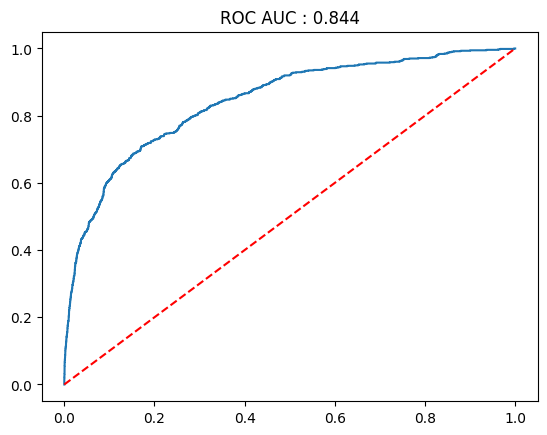

Do you want to save this model? Y/NY


In [128]:
model_validation(LogisticRegression(random_state=2,class_weight='balanced'),x_train_s,y_train,x_test_s,y_test)

[[5886 1007]
 [ 205  531]]
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91      6893
         1.0       0.35      0.72      0.47       736

    accuracy                           0.84      7629
   macro avg       0.66      0.79      0.69      7629
weighted avg       0.91      0.84      0.86      7629



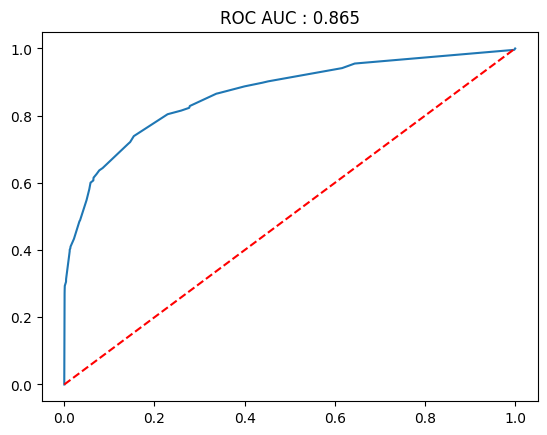

Do you want to save this model? Y/NY


In [129]:
model_validation(DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=3,min_samples_split=2,class_weight='balanced'),x_train_s,y_train,x_test_s,y_test)

[[4990 1903]
 [ 128  608]]
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83      6893
         1.0       0.24      0.83      0.37       736

    accuracy                           0.73      7629
   macro avg       0.61      0.78      0.60      7629
weighted avg       0.90      0.73      0.79      7629



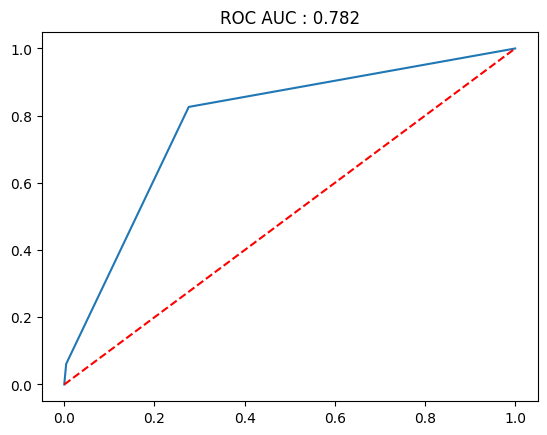

Do you want to save this model? Y/NY


In [130]:
model_validation(DecisionTreeClassifier(class_weight='balanced', **gscv_dt.best_params_),x_train_s,y_train,x_test_s,y_test)

[[6840   53]
 [ 431  305]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      6893
         1.0       0.85      0.41      0.56       736

    accuracy                           0.94      7629
   macro avg       0.90      0.70      0.76      7629
weighted avg       0.93      0.94      0.93      7629



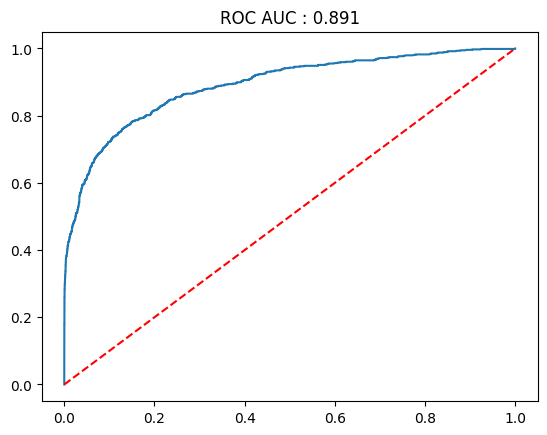

Do you want to save this model? Y/NY


In [131]:
model_validation(GradientBoostingClassifier(),x_train_s,y_train,x_test_s,y_test)

[[6848   45]
 [ 451  285]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      6893
         1.0       0.86      0.39      0.53       736

    accuracy                           0.93      7629
   macro avg       0.90      0.69      0.75      7629
weighted avg       0.93      0.93      0.92      7629



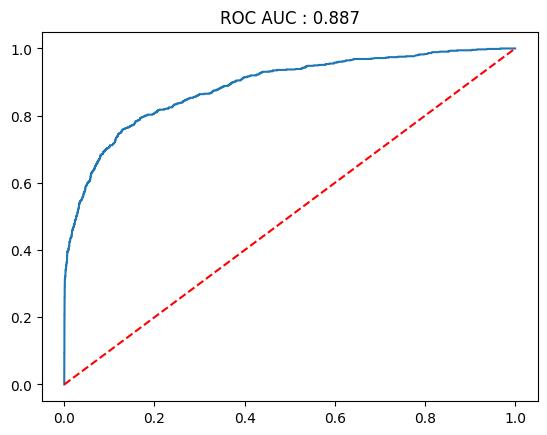

Do you want to save this model? Y/NY


In [132]:
model_validation(AdaBoostClassifier(),x_train_s,y_train,x_test_s,y_test)

[[6787  106]
 [ 408  328]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      6893
         1.0       0.76      0.45      0.56       736

    accuracy                           0.93      7629
   macro avg       0.85      0.72      0.76      7629
weighted avg       0.93      0.93      0.92      7629



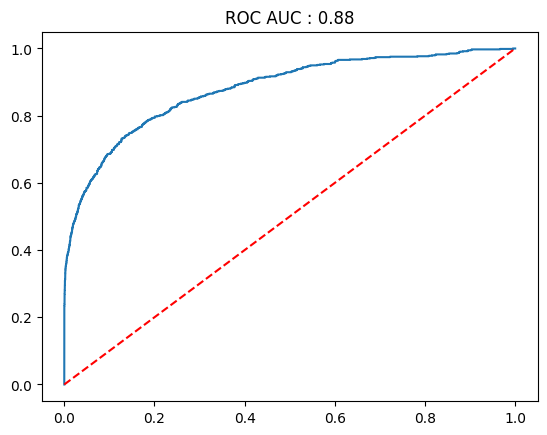

Do you want to save this model? Y/NY


In [133]:
model_validation(XGBClassifier(),x_train_s,y_train,x_test_s,y_test)

[[6616  277]
 [ 320  416]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      6893
         1.0       0.60      0.57      0.58       736

    accuracy                           0.92      7629
   macro avg       0.78      0.76      0.77      7629
weighted avg       0.92      0.92      0.92      7629



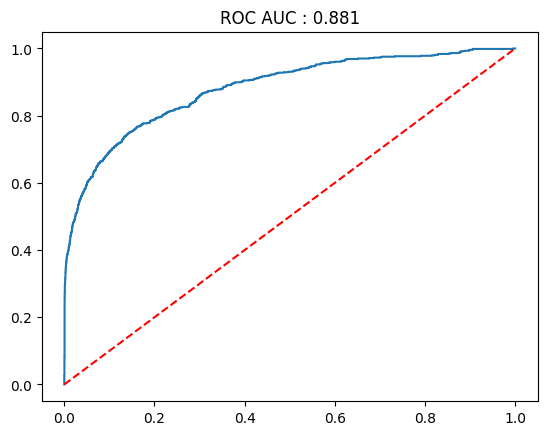

Do you want to save this model? Y/NY


In [134]:
model_validation(VotingClassifier(estimators=[('dt', model_dt_f), ('xgb', model_xg)], voting='soft'),x_train_s,y_train,x_test_s,y_test)

/Users/himanidhawan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/himanidhawan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

[[6766  127]
 [ 496  240]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      6893
         1.0       0.65      0.33      0.44       736

    accuracy                           0.92      7629
   macro avg       0.79      0.65      0.70      7629
weighted avg       0.90      0.92      0.91      7629



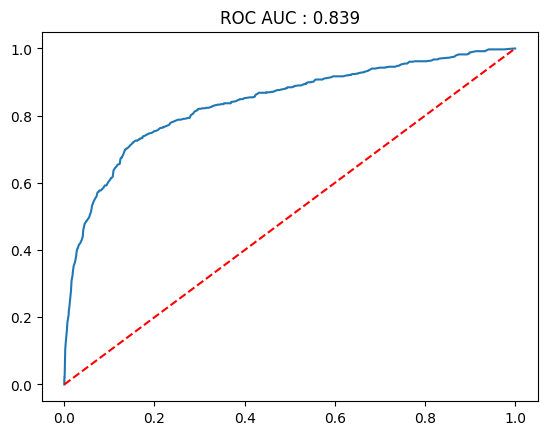

Do you want to save this model? Y/NY


In [135]:
model_validation(StackingClassifier(estimators=[('lr', model_base), ('dt', model_dt_f)], final_estimator=model_xg),x_train_s,y_train,x_test_s,y_test)

In [136]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen Kappa
0,"LogisticRegression(class_weight='balanced', ra...",0.777428,0.739130,0.265366,0.390524,0.289675
1,DecisionTreeClassifier(class_weight='balanced'...,0.841133,0.721467,0.345254,0.467018,0.387026
2,DecisionTreeClassifier(class_weight='balanced'...,0.733779,0.826087,0.242135,0.374500,0.264798
3,GradientBoostingClassifier(),0.936558,0.414402,0.851955,0.557587,0.527770
4,AdaBoostClassifier(),0.934985,0.387228,0.863636,0.534709,0.505152
5,"XGBClassifier(base_score=None, booster=None, c...",0.932626,0.445652,0.755760,0.560684,0.526817
6,"VotingClassifier(estimators=[('dt',\n ...",0.921746,0.565217,0.600289,0.582225,0.539098
7,"StackingClassifier(estimators=[('lr',\n ...",0.918338,0.326087,0.653951,0.435177,0.396428
